In [68]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [69]:
data =pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [71]:
data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})

features = data[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [72]:
scaler = StandardScaler()
scaled_features =scaler.fit_transform(features)

In [73]:
pca=PCA(n_components=2)
pca_features=pca.fit_transform(scaled_features)
pca_df =pd.DataFrame(data=pca_features, columns=('PC1','PC2'))

In [74]:
wcss =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

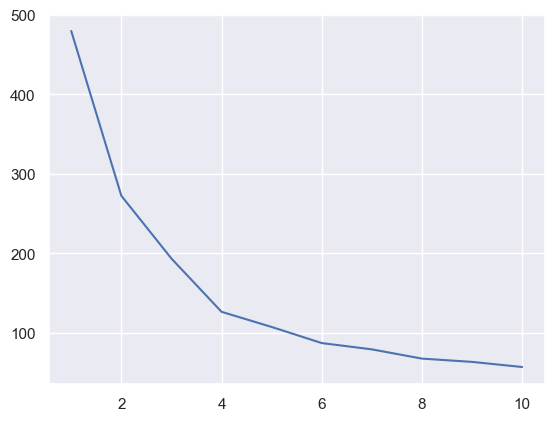

In [75]:
sns.set()
plt.plot(range(1,11),wcss)
plt.show()

In [76]:
kmeans =KMeans(n_clusters=6, random_state=42)
clusters =kmeans.fit_predict(pca_df)
pca_df['clusters']=clusters

data['Cluster'] = clusters

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7376\851618925.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=pca_df, x='PC1', y='PC2',  palette='tab10')


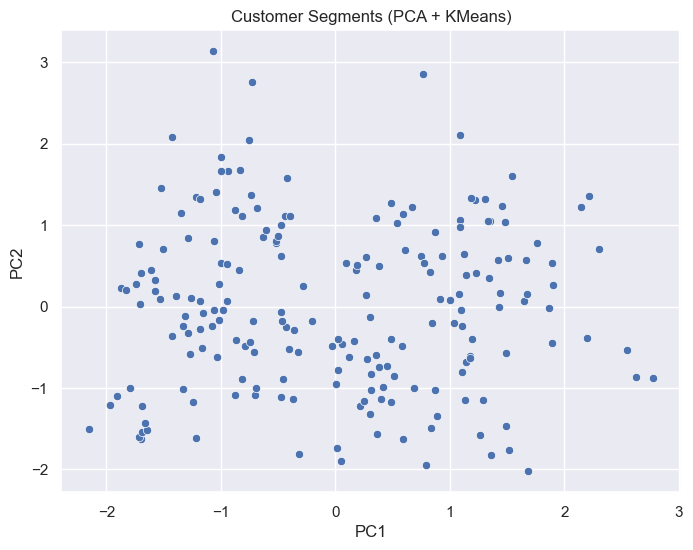

In [77]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2',  palette='tab10')
plt.title("Customer Segments (PCA + KMeans)")
plt.show()


In [78]:
cluster_profile = data.groupby("Cluster")[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
cluster_profile


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,48.360000,73.220000,31.280000
1,41.710526,49.131579,42.973684
2,26.294118,29.529412,74.117647
3,31.066667,85.700000,72.766667
4,26.595238,61.285714,68.428571
5,55.260870,40.739130,22.869565
